In [1]:
import numpy as np

import pandas as pd

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

color = sns.color_palette()

sns.set_style('darkgrid')
from scipy import stats

from scipy.stats import norm, skew

pd.set_option('display.float_format', lambda x:'{:.3f}'.format(x)) #limiting floats output to 3 decimal points


In [2]:
train = pd.read_csv('C:/Users/pjiang/Desktop/data/house-prices-advanced-regression-techniques/train.csv')

In [3]:
test = pd.read_csv('C:/Users/pjiang/Desktop/data/house-prices-advanced-regression-techniques/test.csv')

In [4]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
#check the number of samples and features
print("The train data size before dropping Id feature is : {}".format(train.shape))
print("The test data size before dropping Id feature is : {}".format(test.shape))

train_Id = train['Id']
test_Id = test['Id']

train.drop('Id', axis=1, inplace=True)
test.drop('Id', axis=1, inplace=True)

print('The train data size after dropping Id feature is :{}'.format(train.shape))
print('The test data size after dropping Id feature is :{}'.format(test.shape))

The train data size before dropping Id feature is : (1460, 81)
The test data size before dropping Id feature is : (1459, 80)
The train data size after dropping Id feature is :(1460, 80)
The test data size after dropping Id feature is :(1459, 79)


## Data processing

### Outliers

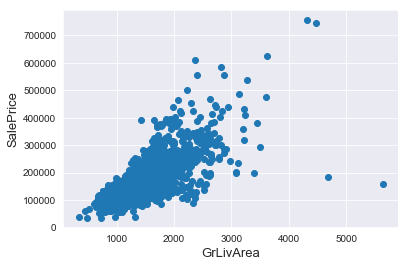

In [7]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize = 13)
plt.xlabel('GrLivArea', fontsize = 13)
plt.show()

In [8]:
#Deleting outliers
train = train.drop(train[(train['GrLivArea']>4000)&(train['SalePrice']<300000)].index)

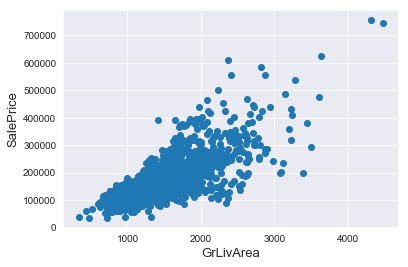

In [9]:
#check the graph again
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize = 13)
plt.xlabel('GrLivArea', fontsize = 13)
plt.show()

## Target Variable

mu = 180932.92 and sigma = 79467.79


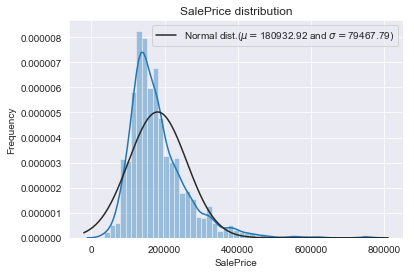

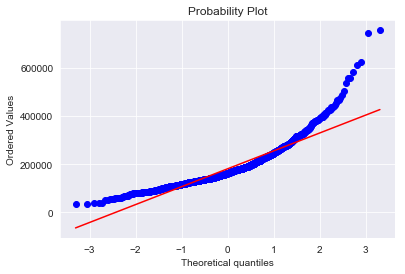

In [10]:
sns.distplot(train['SalePrice'], fit = norm);

#Get the fitted parameters used by function
(mu, sigma) = norm.fit(train['SalePrice'])
print('mu = {:.2f} and sigma = {:.2f}'.format(mu, sigma))

#plot the distribution
plt.legend(['Normal dist.($\mu=${:.2f} and $\sigma = ${:.2f})'.format(mu, sigma)], loc = 'best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-Plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot = plt)
plt.show()

### Log-transformation of the target variable

mu = 12.02 and sigma = 0.40


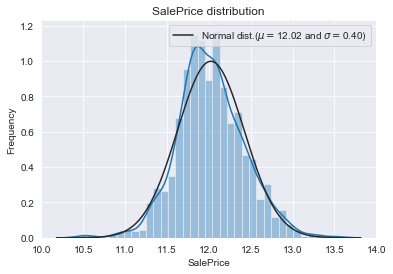

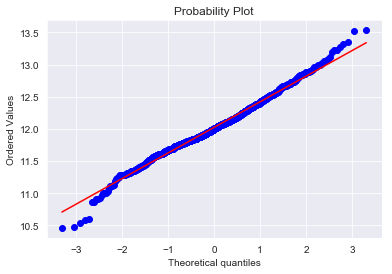

In [11]:
# use the numpy function log1p whch applies log(1+x) to all elements of th column
train['SalePrice'] = np.log1p(train['SalePrice'])

#Check the new distribution
sns.distplot(train['SalePrice'], fit = norm)

(mu, sigma) = norm.fit(train['SalePrice'])
print('mu = {:.2f} and sigma = {:.2f}'.format(mu, sigma))

#plot the distributio
plt.legend(['Normal dist.($\mu=${:.2f} and $\sigma = ${:.2f})'.format(mu, sigma)], loc = 'best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-Plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot = plt)
plt.show()

## Feature Engineering

In [12]:
train.shape

(1458, 80)

In [13]:
ntrain = train.shape[0]
ntest = train.shape[0]

In [14]:
y_train = train.SalePrice.values
all_data = pd.concat((train,test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print('All_data size is :{}'.format(all_data.shape))

All_data size is :(2917, 79)


C:\Users\pjiang\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


### Missing Data

In [15]:
all_data_na = (all_data.isnull().sum()/len(all_data))*100
all_data_na = all_data_na.drop(all_data_na[all_data_na==0].index).sort_values(ascending = False)[:30]
missing_data = pd.DataFrame({'Missing Ratio':all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.691
MiscFeature,96.400
Alley,93.212
Fence,80.425
FireplaceQu,48.680
LotFrontage,16.661
GarageQual,5.451
GarageCond,5.451
GarageFinish,5.451
GarageYrBlt,5.451


Text(0.5, 1.0, 'Percent missing data by feature')

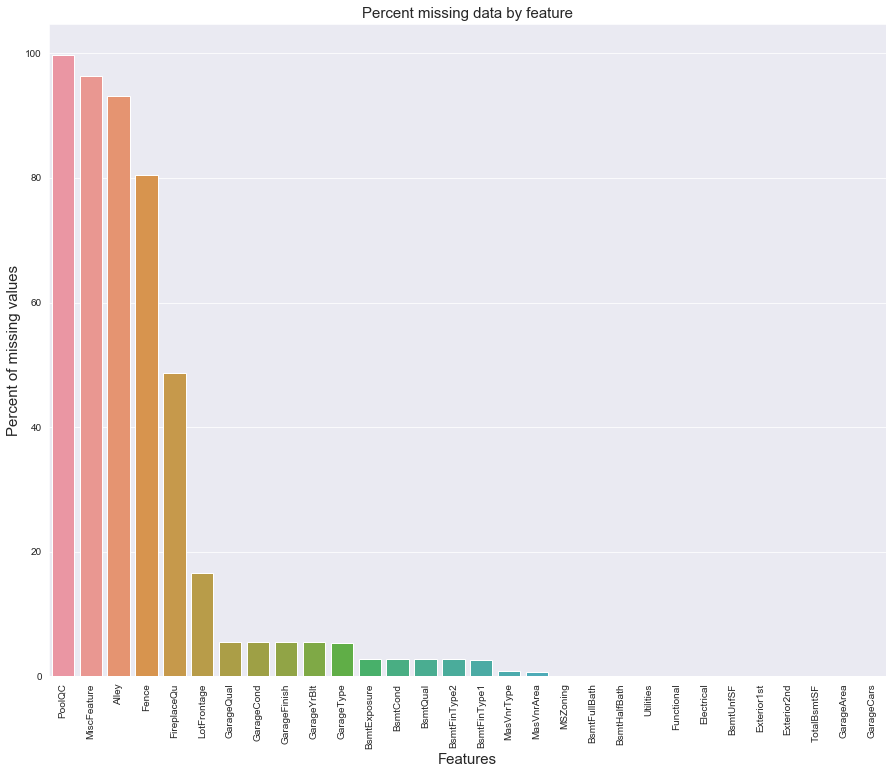

In [16]:
f,ax = plt.subplots(figsize=(15,12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y = all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize = 15)
plt.title('Percent missing data by feature', fontsize = 15)

### Dta Correlation

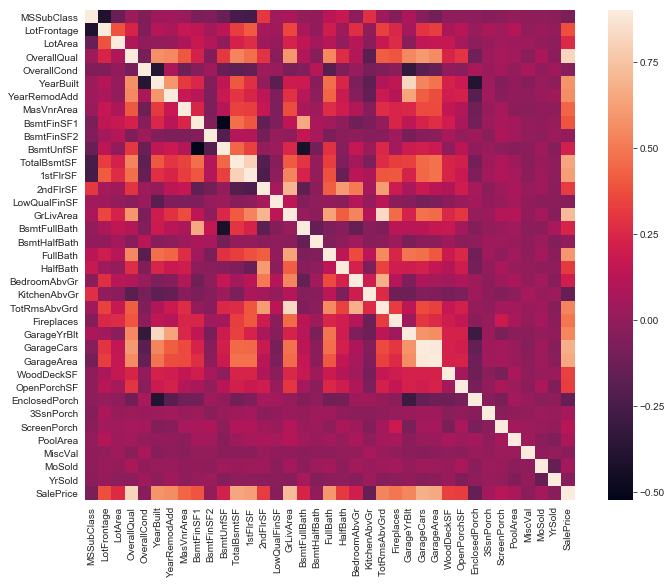

In [17]:
#Corrleation map to see how features are correlated with SalePrice
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

### Imputing missing values

* PoolQC: data description says NA means "NO Poll". That make sense, given the huge ratio of missing value and majority of houses have no Pool at all in general

In [18]:
all_data['PoolQC'] = all_data['PoolQC'].fillna('None')

* MiscFeature: data description says NA means "No misc feature"

In [19]:
all_data['MiscFeature'] = all_data['MiscFeature'].fillna('None')

* Alley: data description asys NA means "no alley access"

In [20]:
all_data['Alley'] = all_data['Alley'].fillna('None')

In [21]:
all_data['Fence'] = all_data['Fence'].fillna('None')

In [22]:
all_data['FireplaceQu'] = all_data['FireplaceQu'].fillna('None')

* LotFrontage: since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood, we call fill in missing values by the median LotFrontage of the neighborbood

In [23]:
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x:x.fillna(x.median()))

In [24]:
for col in('GarageType','GarageFinish','GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

In [25]:
for col in('GarageYrBlt','GarageArea','GarageCars'):
    all_data[col] = all_data[col].fillna(0)

In [26]:
for col in('BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

In [27]:
for col in ('BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

In [28]:
all_data['MasVnrType'] = all_data['MasVnrType'].fillna('None')
all_data['MasVnrArea'] = all_data['MasVnrArea'].fillna('None')

In [29]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

In [30]:
all_data = all_data.drop(['Utilities'], axis = 1)

In [31]:
all_data['Functional'] = all_data['Functional'].fillna('Typ')

* Electrical: it has one NA value, since this fieatures has mostly 'SBrkr', we can set that for the missing value

In [32]:
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

In [33]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

In [34]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])

In [35]:
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

In [36]:
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

In [37]:
all_data['MSSubClass'] = all_data['MSSubClass'].fillna('None')

In [38]:
#Check remaining missing values 
all_data_na = (all_data.isnull().sum()/len(all_data))*100
all_data_na = all_data_na.drop(all_data_na[all_data_na==0].index).sort_values(ascending = False)

missing_data = pd.DataFrame({'Missing Ratio': all_data_na})
missing_data.head()

,Missing Ratio


## More feature engneering

### Transforming some numerical variables that are really categorical

In [39]:
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)

In [40]:
all_data['OverallCond'] = all_data['OverallCond'].astype(str)

In [41]:
#Year and moth sold are transformed into categorical features
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

### Label Encoding some categorical variables that may contain information in their ordering set

In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond','GarageQual','GarageCond', 'ExterQual','ExterCond','HeatingQC','PoolQC','KitchenQual',
       'BsmtFinType1','BsmtFinType2','Functional','Fence','BsmtExposure','GarageFinish','LandSlope','LotShape','PavedDrive','Street',
       'Alley','CentralAir','MSSubClass','OverallCond','YrSold','MoSold')

In [44]:
for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(all_data[c].values))
    all_data[c] = lbl.transform(list(all_data[c].values))
    
#shape
print('Shape all_Data:{}'.format(all_data.shape))

Shape all_Data:(2917, 78)


### Adding one more important feature

In [45]:
#adding total sqfootage feature
all_data['TotalSF'] = all_data['TotalBsmtSF']+all_data['1stFlrSF']+all_data['2ndFlrSF']

### Skewed features

In [46]:
numeric_feats = all_data.dtypes[all_data.dtypes != 'object'].index

#check the skew of all numerical feature
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)
print('Skew in numerical features: \n')
skewness = pd.DataFrame({'Skew':skewed_feats})
skewness.head(10)

Skew in numerical features: 



,Skew
MiscVal,21.940
PoolArea,17.689
LotArea,13.109
LowQualFinSF,12.085
3SsnPorch,11.372
LandSlope,4.973
KitchenAbvGr,4.301
BsmtFinSF2,4.145
EnclosedPorch,4.002
ScreenPorch,3.945


### Box Cox Transformation of(highly) skewed features

we use the scipy function boxcox1p which computed the Box-Cox transformation of 1+x

Note that setting $\lambda = 0$ is equivalent to log1p used above for the target variable

In [47]:
skewness = skewness[abs(skewness)>0.75]
print('There are {} skewed numerical features to Box Cox transform'.format(skewness.shape[0]))

There are 58 skewed numerical features to Box Cox transform


In [48]:
from scipy.special import boxcox1p

In [49]:
skewed_feats = skewness.index
lam = 0.15
for feat in skewed_feats:
    all_data[feat] = boxcox1p(all_data[feat], lam)

**Geting dummy categorical features**

In [50]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2917, 662)


In [51]:
train = all_data[:ntrain]
test = all_data[ntrain:]

# Modelling

In [52]:
from sklearn.linear_model import ElasticNet, Lasso, BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split

In [53]:
#Validation function

n_folds = 5
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv=kf))
    return(rmse)

## Base models

* Lasso regression

This model may be very sensitive to outliers. So we need to made it more robust on them. For that we use the sklearn's Robustscaler() method on pipline

In [54]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha=0.0005, random_state=1))

* Elastic Net Regression:

In [55]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha = 0.0005, random_state=3))

* Kernel Ridge Regression

In [56]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree = 2, coef0=2.5)

* Gradient Boosting Regression:

In [57]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4, max_features='sqrt', min_samples_leaf=15, min_samples_split=10,
                                  loss='huber', random_state=5)

## Base Models scores

In [58]:
score = rmsle_cv(lasso)
print('Lasso score:{:4f}({:.4f})'.format(score.mean(), score.std()))

Lasso score:0.111479(0.0074)


In [59]:
score = rmsle_cv(KRR)
print('kernel Ridge score:{:4f}({:.4f})'.format(score.mean(), score.std()))

kernel Ridge score:0.117366(0.0059)


In [60]:
score = rmsle_cv(ENet)
print('ElasticNet score:{:4f}({:.4f})'.format(score.mean(), score.std()))

ElasticNet score:0.112340(0.0079)


In [61]:
score = rmsle_cv(GBoost)
print('Gradient Boosting score:{:4f}({:.4f})'.format(score.mean(), score.std()))

Gradient Boosting score:0.115964(0.0080)


## Stacking models

### Simplest stacking approach: Averaging base models

In [62]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
    
    # We define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # train cloned base models
        for model in self.models_:
            model.fit(X, y)
        return self
    
    # now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([model.predict(X) for model in self.models_])
        
        return np.mean(predictions, axis=1)

### Average base models score

we just aveerage four models here ENet, GBoost, KRR and lasso. 

In [63]:
averaged_models = AveragingModels(models=(ENet, GBoost, KRR, lasso))
score = rmsle_cv(averaged_models)
print(" Averaged base models score:{:.4f}({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score:0.1093(0.0074)



### less simple stacking: Adding a meta-model

In this approach, we add a meta-model on averaged base models and use the out-of-folds preditions of these base models to train our meta-model

The procedure, for the training part, may be described as follows:
1. split the total training set into two disjoin set(here train and holdout)
2. train several base models on the first part(train)
3. Test these base models on the second part(holdout)
4. Use the predictions from 3(called out-of-folds predictions) as the inputs, and the correct responses(target variable) as the outputs to train a higher level learner called meta-model

The first three steps are done iteratively. If we take for example a 5-fold stacking, we first split the training data into 5 folds. Then we will do 5 iterations. In each iteration, we train every base model on 4 folds and predict on the remaining fold(holdout fold).
So, we will be sure, after 5 iterations, that the entire data is used to get out-of-folds predictions that we will then use as new feature to train out meta-model in the step 4.


In [73]:
class StackingAverageModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__ (self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
    
    #fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=42)
        
        #train cloned base models then create out-of-fold predictions
        #that are needed to train the cloned meta-model
        
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X,y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index],y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        #Now train the cloned meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        
        return self
    
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_feature = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_])
        return self.meta_model_.predict(meta_feature)

### Stacking Averaged models Score

To make the two approaches comparable(by using the same number of models), we just average Enet KRR and Gboost, then we add lasso as meta-model

In [74]:
stacked_averaged_models = StackingAverageModels(base_models = (ENet, GBoost, KRR), meta_model=lasso)

score = rmsle_cv(stacked_averaged_models)


Stacking Averaged models score: {:.4f} ({:.4f})


AttributeError: 'NoneType' object has no attribute 'format'

In [76]:
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.1085 (0.0075)


In [77]:
from sklearn.metrics import mean_squared_error

In [78]:
def rmsle(y,y_pred):
    return np.sqrt(mean_squared_error(y,y_pred))

### Final training and prediction

In [79]:
stacked_averaged_models.fit(train.values, y_train)

StackingAverageModels(base_models=(Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('elasticnet', ElasticNet(alpha=0.0005, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=...nelRidge(alpha=0.6, coef0=2.5, degree=2, gamma=None, kernel='polynomial',
      kernel_params=None)),
           meta_model=Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('lasso', Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=1,
   selection='cyclic', tol=0.0001, warm_start=False))]),
           n_folds=5)

In [80]:
stacked_train_pred = stacked_averaged_models.predict(train.values)

In [81]:
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))

In [82]:
print(rmsle(y_train, stacked_train_pred))

0.07749069332012468
